## Array, recursion, LL basics


### Fall2023 Q1 (MCQ)

arr = [2, 1, 5, 3, 5, 5, 4, 2, 1, 2, 5, 3].

An auxiliary array aux_arr is built using
key-indexing.
Which of the following is TRUE?

- a. aux_arr[2] = 1,
- b. aux_arr[1] = 0,
- c. aux_arr[2] = 3,
- d. aux_arr[5] = 5

**Key-indexing** means using an auxiliary array (aux_arr) where each index represents a key (value from the original array) and the value at each index stores the **count of occurrences of that key.**

Auxiliary Array with frequencies: [0, 2, 3, 2, 1, 4]

Ans: c. aux_arr[2] = 3 -> True

In [ ]:
# Original array
arr = [2, 1, 5, 3, 5, 5, 4, 2, 1, 2, 5, 3]

# Determine the range of values
max_value = max(arr)  # Maximum value in the array

# Initialize the auxiliary array with zeros
aux_arr = [0] * (max_value + 1)

# Build the auxiliary array using key-indexing
for value in arr:
    aux_arr[value] += 1

# Display the auxiliary array
print("Auxiliary Array with frequencies:", aux_arr)

# Verify the options
print("a. aux_arr[2] =", aux_arr[2], "->", aux_arr[2] == 1)
print("b. aux_arr[1] =", aux_arr[1], "->", aux_arr[1] == 0)
print("c. aux_arr[2] =", aux_arr[2], "->", aux_arr[2] == 3)
print("d. aux_arr[5] =", aux_arr[5], "->", aux_arr[5] == 5)

Auxiliary Array with frequencies: [0, 2, 3, 2, 1, 4]
a. aux_arr[2] = 3 -> False
b. aux_arr[1] = 2 -> False
c. aux_arr[2] = 3 -> True
d. aux_arr[5] = 4 -> False


In [ ]:
def fun(n):
    if n < 2:
        return 3
    return fun(n-2) + 2 * fun(n-4)

fun(5)

15

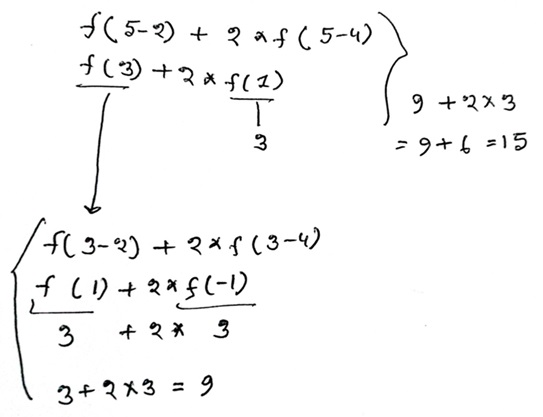

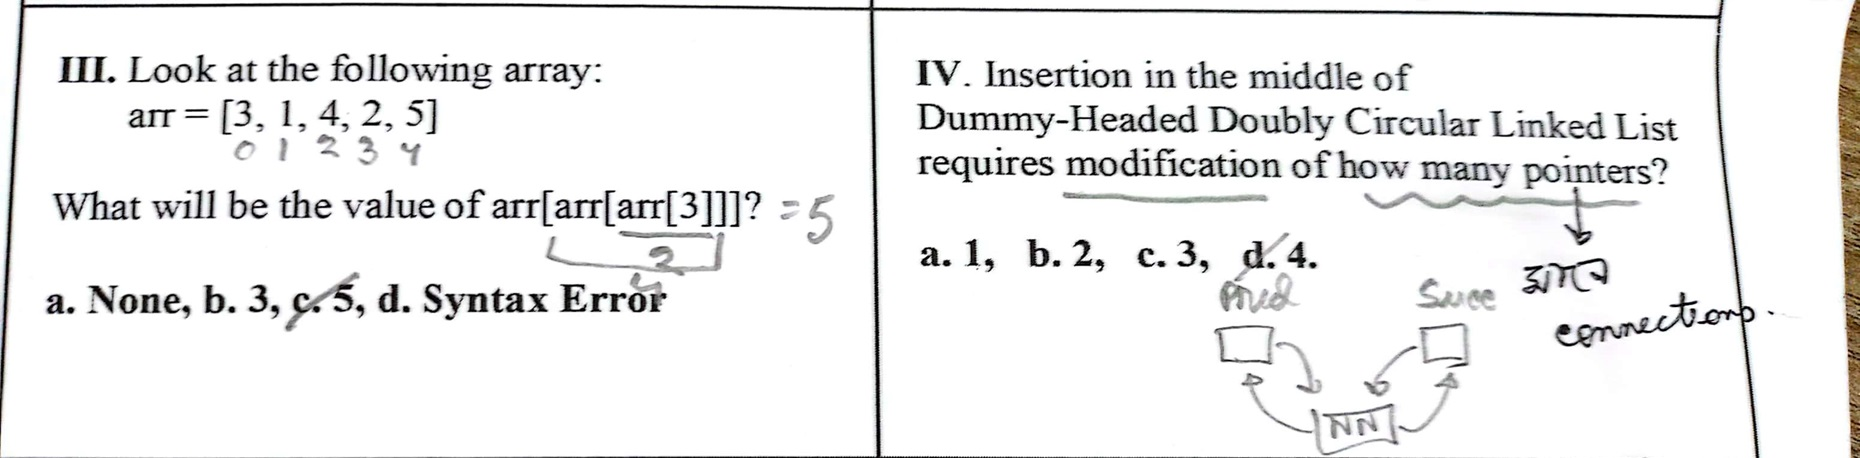

## Binary Tree (BT)

### Summer2024 Q1

In [ ]:
class Node:
    def __init__(self, elem, left=None, right=None):
        self.elem = elem
        self.left = left
        self.right = right


def fun(root):
    if root == None:
        return 7
    elif root.elem > 6:
        return fun(root.right) - root.elem
    else:
        return root.elem - fun(root.left)
"""
        10
       /  \
      6    4
          /  \
         3    8
"""
# Driver code

nodes = {
    10: Node(10),
    6: Node(6),
    4: Node(4),
    8: Node(8),
    3: Node(3)
}

# Constructing the tree
nodes[10].left = nodes[6]
nodes[10].right = nodes[4]

nodes[4].left = nodes[3]
nodes[4].right = nodes[8]


# Applying the function to the tree's root
result = fun(nodes[10])
print(f"Result of fun(root) is: {result}")

Result of fun(root) is: -2


### Summer2024 Q1

In [ ]:
def f(x):
    if x == 1:
        print(x, end=' ')
        return
    f(x // 2)
    print(x, end=' ')
f(16)

1 2 4 8 16 

### Fall 2024 Q3

You are given a binary tree where each node stores a character. You need to generate a key based on the **leaf nodes** positioned at the **even levels** from **right to left**. Your task is to  implement a function/method named `build_key` that takes the root of the binary tree and  constructs the key string based on the criteria above and finally returns it.

- If there are **no leaf** nodes on even levels, then the function/method should return an **empty string.**  

Consider the `Node` class for Binary Tree already defined with:  
- `elem` (Type: `String`)  
- `left` (Type: `Node`)  
- `right` (Type: `Node`)  

You can use helper functions or extra parameters in the given function if required.  
**You cannot use any other data structures than the given binary tree.**


In [ ]:
class Node:
    def __init__(self, elem, left=None, right=None):
        self.elem = elem
        self.left = left
        self.right = right

# Helper function to recursively build the key string
def build_key(node, level=0):
    if node is None:
        return ""

    # If we are at a leaf node and it's on an even level, add it to the key
    if node.left is None and node.right is None:
        if level % 2 == 0:  # Even level
            return node.elem
        else:
            return ""

    # Recur for the right and left child
    right_key = build_key(node.right, level + 1)
    left_key = build_key(node.left, level + 1)

    # Concatenate the right key first (to ensure right-to-left order)
    return right_key + left_key

    # could have directly written
    # return build_key(node.right, level + 1) + build_key(node.left, level + 1)


# Manually creating the tree
root = Node('U')  # Root node at level 0
root.left = Node('V')  # Level 1
root.right = Node('W')  # Level 1

root.left.left = Node('X')  # Level 2, V
root.left.right = Node('Y')  # Level 2, V

root.left.left.left = Node('J')  # Level 3 (Leaf node), X
root.left.left.right = Node('N')  # Level 3 (Leaf node) X

root.left.left.left.left = Node('K')  # Level 3 (Leaf node), J

root.right.left = Node('Z')  # Level 2, W
root.right.right = Node('I')  # Level 2, W

root.right.left.left = Node('L')  # Level 3 (Leaf node), Z
root.right.left.right = Node('M')  # Level 3 (Leaf node), Z

# Test the function
print(build_key(root))  # Expected Output: "IYK"

IYK



###  Summer 2024 Q3

You are given a **binary tree** where each node stores a character. You are given the root of a binary tree and a key as inputs.

- The key is **valid** if there is a **path from the root to a leaf node** in
the given tree.

Now, your Task is to implement a recursive function named is_Valid(root, key)
that determines if the key is valid or not. The function should return True if the key is valid and False otherwise.


Consider the Node class for Binary Tree already defined with elem, left and right variables. You can use helper functions and extra parameters if required. You can not use any other data structure than the binary tree.

In [ ]:
class Node:
    def __init__(self, elem, left=None, right=None):
        self.elem = elem
        self.left = left
        self.right = right


def is_Valid(root, key, index=0):
    # Base case: If the root is None, return False
    if root is None:
        return False

    # If index is out of bounds or the root's element doesn't match the current key character
    if index >= len(key) or root.elem != key[index]:
        return False

    # If it's a leaf node and we've matched the entire key
    if root.left is None and root.right is None and index == len(key) - 1:
        return True

    # Otherwise, recursively check the left and right subtrees with the next index
    left_valid = is_Valid(root.left, key, index + 1)
    right_valid = is_Valid(root.right, key, index + 1)

    # Return True if either subtree has a valid path
    return left_valid or right_valid
    ## COuld have directly written
    ## return is_valid(root.left, key, index + 1) or is_valid(root.right, key, index + 1)


# Creating the binary tree:
#         C
#       /   \
#      S     R
#     / \   / \
#    T   E M   P
#             /
#            D
nodes = {
    'C': Node('C'),
    'S': Node('S'),
    'R': Node('R'),
    'T': Node('T'),
    'E': Node('E'),
    'M': Node('M'),
    'P': Node('P'),
    'D': Node('D'),
}

nodes['C'].left = nodes['S']
nodes['C'].right = nodes['R']

nodes['S'].left = nodes['T']
nodes['S'].right = nodes['E']

nodes['R'].left = nodes['M']
nodes['R'].right = nodes['P']

nodes['P'].left = nodes['D']

# Test Cases
print(is_Valid(nodes['C'], "CSE"))  # True (C → S → E)
print(is_Valid(nodes['C'], "CRA"))  # False (No valid path for CRA)
print(is_Valid(nodes['C'], "CRP"))  # False (P is not a leaf)


True
False
False


### Spring 2024 Q3 (BT)

Given a Binary Tree, complete a function that finds if the given Binary Tree is a SumTree or not.

* A SumTree is a Binary Tree where the value of a node is equal to the sum of the nodes present in its left subtree and right subtree.
    * An empty tree is SumTree and the sum of an empty tree can be considered as 0.
    * A leaf node is also considered as SumTree.

The function should return True if it is a SumTree and otherwise False.

Consider the Node class for Binary Tree already defined with elem, left and right variables.

You can use helper functions.YOU CANNOT USE LIST OR DICTIONARY, any built-in function, or global variables.


In [ ]:
class Node:
    def __init__(self, elem, left=None, right=None):
        self.elem = elem
        self.left = left
        self.right = right


def sumTree(root):
    # Base case: An empty tree is a SumTree
    if root is None:
        return True

    # A leaf node is also considered a SumTree
    if root.left is None and root.right is None:
        return True

    # Calculate the sum of the left subtree
    left_sum = subtreeSum(root.left)

    # Calculate the sum of the right subtree
    right_sum = subtreeSum(root.right)

    # Check if current node's value equals the sum of its left and right subtree
    # Also, recursively check if left and right subtrees are SumTrees
    return (root.elem == left_sum + right_sum) and sumTree(root.left) and sumTree(root.right)

def subtreeSum(node):
    # Base case: null node contributes 0 to the sum
    if node is None:
        return 0

    # Return sum of this node and all nodes in its left and right subtree
    return node.elem + subtreeSum(node.left) + subtreeSum(node.right)


# Example Usage:
# Creating a SumTree:
#       26
#      /  \
#     10   3
#    /  \    \
#   4    6    3
root = Node(26, Node(10, Node(4), Node(6)), Node(3, None, Node(3)))
print(sumTree(root))  # Output: True


node26 = Node(26, Node(10, Node(4), Node(6)), Node(3, None, Node(3)))
node10 = node26.left
node3 = node26.right

print("Node 26:")
left_sum_26 =  subtreeSum(node26.left)
right_sum_26 =  subtreeSum(node26.right)
print(f"Sum of left({left_sum_26}) + sum of right({right_sum_26}) = {node26.elem}")

print("\nNode 10:")
left_sum_10 =  subtreeSum(node10.left)
right_sum_10 =  subtreeSum(node10.right)
print(f"Sum of left({left_sum_10}) + sum of right({right_sum_10}) = {node10.elem}")

print("\nNode 3:")
left_sum_3 = 0 if node3.left is None else  subtreeSum(node3.left)
right_sum_3 = 0 if node3.right is None else  subtreeSum(node3.right)
print(f"Sum of left({left_sum_3}) + sum of right({right_sum_3}) = {node3.elem}")


True
Node 26:
Sum of left(20) + sum of right(6) = 26

Node 10:
Sum of left(4) + sum of right(6) = 10

Node 3:
Sum of left(0) + sum of right(3) = 3


In [ ]:
class Node:
    def __init__(self, elem, left=None, right=None):
        self.elem = elem
        self.left = left
        self.right = right

def sumTree(root):
    """
    Returns (isSumTree, totalSum):
    - isSumTree: whether the subtree rooted at 'root' is a SumTree
    - totalSum: sum of all nodes in this subtree
    """
    if root is None:
        return True, 0

    if root.left is None and root.right is None: # leaf node
        return True, root.elem

    # Recursively check left and right subtrees
    is_left_sumtree, left_sum = sumTree(root.left)
    is_right_sumtree, right_sum = sumTree(root.right)

    # Current node satisfies SumTree property if:
    # 1. Left and right subtrees are SumTrees
    # 2. root.elem == left_sum + right_sum
    is_current_sumtree = (is_left_sumtree==True and
                          is_right_sumtree==True and
                          root.elem == left_sum + right_sum)

    # Return whether this subtree is a SumTree, and the total sum including root
    return is_current_sumtree, root.elem + left_sum + right_sum

# Example usage:
#       26
#      /  \
#     10   3
#    /  \    \
#   4    6    3
root = Node(26, Node(10, Node(4), Node(6)), Node(3, None, Node(3)))

result, _ = sumTree(root)
print(result)  # Output: True

True


### Fall 2024 Q6 (Bonus)

The binary tree, called the **Huffman coding tree**, has all the possible valid characters as the  
**leaves**, and all the internal nodes contain `None`/`null`.  

- Each transition to a **left child** represents a **string 0-value bit**.  
- Each transition to a **right child** represents a **string 1-value bit**.  

The **bit representation of a character** is the sequence of 0s and 1s you get through the path  
from the **root to the leaf** holding the character.

### Examples:
- The representation of `'a'` would be `0` (since we move only left one time).  
- `'n'` would be `101` (moving right → left → right).  
- `'d'` would be `110` (moving right → right → left).  

---

### Node Structure:
Each node of the Huffman encoding tree has the following properties:
- `parent`: reference to the parent node *(optional and not required to solve the task)*  
- `left`: reference to the left child  
- `right`: reference to the right child  
- `value`: a character if it’s a **leaf**, otherwise `None`/`null`

---

### Task:
Implement the following recursive function that takes:
- the **root** of a Huffman encoding tree  
- a **string `text`**

and returns a **string representing the compressed bit encoding** of the input string.

> **Note:** The `parent` property of the node is *not required* to solve the task, but it may help optimize your solution.

You may:
- Create other **recursive helper functions** and call them from the main function.  
- Use **loops inside recursive functions**.  
- Use **other data structures** — there are **no restrictions** in this problem.


#### DIctionary based implementation, only for python

In [ ]:
class Node:
    def __init__(self, value=None, left=None, right=None, parent=None):
        """
        Represents a node in the Huffman encoding tree.

        :param value: Character for leaves or None for internal nodes.
        :param left: Left child of the node.
        :param right: Right child of the node.
        :param parent: Parent of the node.
        """
        self.value = value
        self.left = left
        self.right = right
        self.parent = parent

def build_encoding_map(node, path=""):
    """
    Recursively builds a map of characters to their Huffman encoding by traversing the tree.

    :param node: The current node in the Huffman tree.
    :param path: The accumulated bit string from the root to the current node.
    :return: A dictionary mapping characters to their encoded bit strings.
    """
    encoding_map = {}

    if node is None: # Not a leaf node
        return encoding_map

    # If it's a leaf node, add the character and its encoding to the map
    if node.left is None and node.right is None:
        encoding_map[node.value] = path
        return encoding_map

    # Recursively build the encoding map for left and right children
    encoding_map.update(build_encoding_map(node.left, path + "0"))
    encoding_map.update(build_encoding_map(node.right, path + "1"))

    return encoding_map

def getEncoding(root, text):
    """
    Encodes a given text using the Huffman encoding tree.

    :param root: The root node of the Huffman tree.
    :param text: The input text to encode.
    :return: A string representing the encoded bit string of the input text.
    """
    # Build the encoding map from the Huffman tree
    encoding_map = build_encoding_map(root)
    print("encoding_map", encoding_map)

    # Encode the text using the encoding map
    encoded_text = ""
    for char in text:
        encoded_text += encoding_map[char]

    return encoded_text

# Example Huffman Tree
# Build the tree manually for testing
root = Node(None)
root.left = Node('a')  # 'a' -> 0
root.right = Node(None)

root.right.left = Node(None)
root.right.left.left = Node('b')  # 'b' -> 100
root.right.left.right = Node('n')  # 'n' -> 101

root.right.right = Node(None)
root.right.right.left = Node('d')  # 'd' -> 110
root.right.right.right = Node('e')  # 'e' -> 111

# Example usage
text = "and"
print(getEncoding(root, text))  # Output: "0101110"

# Example usage
text = "bad"
print(getEncoding(root, text))  # Output: "100010110"

encoding_map {'a': '0', 'b': '100', 'n': '101', 'd': '110', 'e': '111'}
0101110
encoding_map {'a': '0', 'b': '100', 'n': '101', 'd': '110', 'e': '111'}
1000110


#### String concat based implementation

In [ ]:
class Node:
    def __init__(self, value=None, left=None, right=None, parent=None):
        """
        Represents a node in the Huffman encoding tree.

        :param value: Character for leaves or None for internal nodes.
        :param left: Left child of the node.
        :param right: Right child of the node.
        :param parent: Parent of the node.
        """
        self.value = value
        self.left = left
        self.right = right
        self.parent = parent

def find_encoding(node, target, path=""):
    """
    Recursively finds the encoding of a character in the Huffman tree.

    :param node: The current node being examined.
    :param target: The target character for which we need the encoding.
    :param path: The accumulated path (bit string) to reach the character.
    :return: The bit string encoding for the character.
    """
    # Base case: if the node is None, there's nothing to search
    if node is None:
        return None

    # If it's a leaf node (no children)
    if node.left is None and node.right is None:
        # Check if the leaf node contains the target character
        if node.value == target:
            return path  # Return the accumulated path as the encoding
        else:
            return None  # This leaf does not match the target

    # Recursively search in the left subtree, appending '0' to the path
    result = find_encoding(node.left, target, path + "0")
    if result is not None:
        return result  # If found in left, return it

    # Otherwise, search in the right subtree, appending '1' to the path
    return find_encoding(node.right, target, path + "1")

def getEncoding(root, text):
    """
    Encodes a given text using the Huffman encoding tree.

    :param root: The root node of the Huffman tree.
    :param text: The input text to encode.
    :return: A string representing the encoded bit string of the input text.
    """
    # Encode the entire text by recursively finding the encoding for each character
    encoded_text = ""
    for char in text:
        encoded_text += find_encoding(root, char)

    return encoded_text

# Example Huffman Tree
# Build the tree manually for testing
root = Node(None)
root.left = Node('a')  # 'a' -> 0
root.right = Node(None)

root.right.left = Node(None)
root.right.left.left = Node('b')  # 'b' -> 100
root.right.left.right = Node('n')  # 'n' -> 101

root.right.right = Node(None)
root.right.right.left = Node('d')  # 'd' -> 110
root.right.right.right = Node('e')  # 'e' -> 111

# Example usage
text = "and"
print(getEncoding(root, text))  # Output: "0 101 110"


# Example usage
text = "bad"
print(getEncoding(root, text))  # Output: "100 0 110"


0101110
1000110


### Summer2024 Q5 (Bonus)

#### Solution using recursion easy

In [ ]:
class DirectoryNode:
    def __init__(self, name, is_folder, current=None, next=None):
        self.name = name # Name of the folder or file
        self.is_folder = is_folder # True if it's a folder, False if it's a file
        self.current = current # Points to the first child (for folders)
        self.next = next # Points to the next sibling (folder or file)
#################################################################################


def print_all_directories_recursive(root, level=0):
    if not root: # Base case
        return

    # Indentation based on the level
    indent = "\t" * level

    # Print the current node
    node_type = "(Folder)" if root.is_folder else "(File)"
    print(f"{indent}{root.name} {node_type}")

    # Recursively print the current node's children
    # if its a folder and has children--call on the next level
    if root.is_folder and root.current:
        print_all_directories_recursive(root.current, level + 1)

    # Print the next sibling
    if root.next: # if sibling exits, call on the same level
        print_all_directories_recursive(root.next, level)

#################################################################################
# Driver Code

# Sample directory structure
root = DirectoryNode("root", True)

# Files in the root folder
root.current = DirectoryNode("book.txt", False)

# Anime folder inside root
anime_folder = DirectoryNode("Anime", True)
anime_folder.current = DirectoryNode("Attack On Titan", True)
anime_folder.current.current = DirectoryNode("AOTS1E1.mkv", False)
anime_folder.current.current.next = DirectoryNode("AOTS1E2.mkv", False)

# Connect Anime folder as the sibling of movie.mkv
root.current.next = anime_folder

# Movie folder inside root
movie_folder = DirectoryNode("Movie", True)
movie_folder.current = DirectoryNode("Captain America.mkv", False)

# Connect the Movie folder as the sibling of the Anime folder
root.current.next.next = movie_folder

print_all_directories_recursive(root)

root (Folder)
	book.txt (File)
	Anime (Folder)
		Attack On Titan (Folder)
			AOTS1E1.mkv (File)
			AOTS1E2.mkv (File)
	Movie (Folder)
		Captain America.mkv (File)


#### Solution using loop and stack (complicated)

In [ ]:
def print_all_directories(root):
    if not root:
        return

    # Stack to hold nodes with their level
    stack = [(root, 0)]

    while stack:
        current, level = stack.pop()

        # Print the current node with proper indentation
        indent = "\t" * level
        node_type = "(Folder)" if current.is_folder else "(File)"
        print(f"{indent}{current.name} {node_type}")

        # Push siblings first, so they are processed later
        if current.next:
            stack.append((current.next, level))

        # Push children next, so they are processed first
        if current.is_folder and current.current:
            stack.append((current.current, level + 1))

#################################################################################
# Driver Code

# Sample directory structure
root = DirectoryNode("root", True)

# Files in the root folder
root.current = DirectoryNode("book.txt", False)

# Anime folder inside root
anime_folder = DirectoryNode("Anime", True)
anime_folder.current = DirectoryNode("Attack On Titan", True)
anime_folder.current.current = DirectoryNode("AOTS1E1.mkv", False)
anime_folder.current.current.next = DirectoryNode("AOTS1E2.mkv", False)

# Connect Anime folder as the sibling of movie.mkv
root.current.next = anime_folder

# Movie folder inside root
movie_folder = DirectoryNode("Movie", True)
movie_folder.current = DirectoryNode("Captain America.mkv", False)

# Connect the Movie folder as the sibling of the Anime folder
root.current.next.next = movie_folder

print_all_directories(root)

root (Folder)
	book.txt (File)
	Anime (Folder)
		Attack On Titan (Folder)
			AOTS1E1.mkv (File)
			AOTS1E2.mkv (File)
	Movie (Folder)
		Captain America.mkv (File)


## Binary Search Tree (BST)

### Fall2023 Q1 (MCQ)

On this BST, these following operations are done step by step:


*   i) 23 is inserted
*   ii) Node 29 is deleted using successor
*   iii) The ROOT is deleted using predecessor


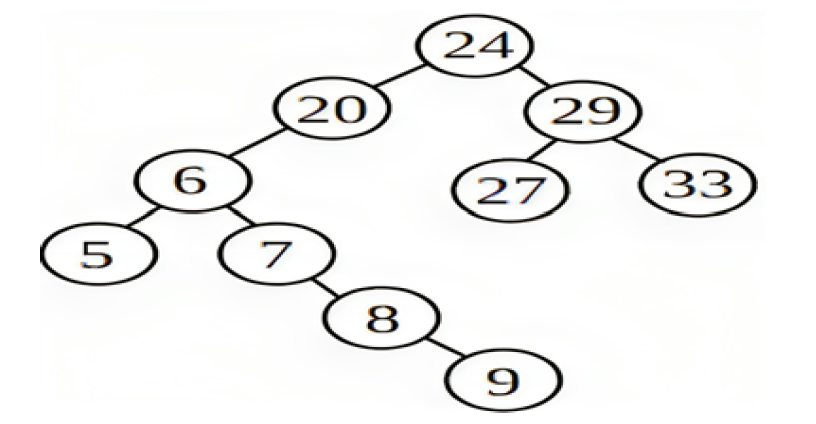

i) 23 is inserted
* 23 is less than 24--go to left
* 23 is grater than 20-- go to right


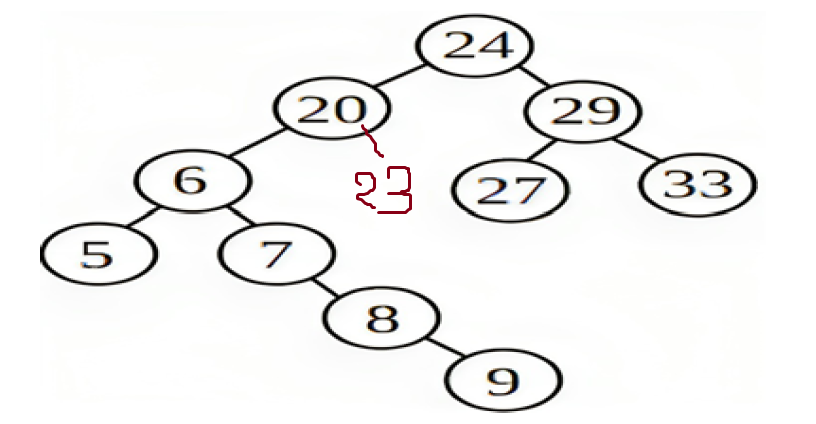

ii) Node 29 is deleted using successor
- Right child exists, right child's left most node--is 33
- Successor of 29 is 33


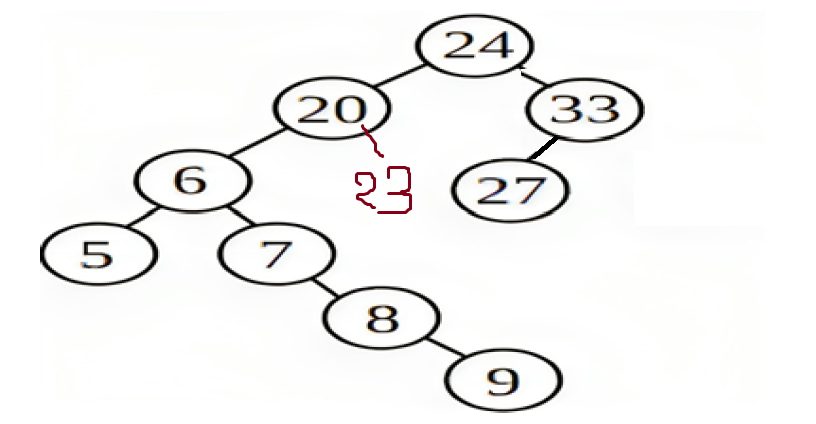

iii) The ROOT is deleted using predecessor
- Left subtree exits
- Left sub-tree's right-most node is 23
- predecessor of 24 is 23
- Replace 24 with 23

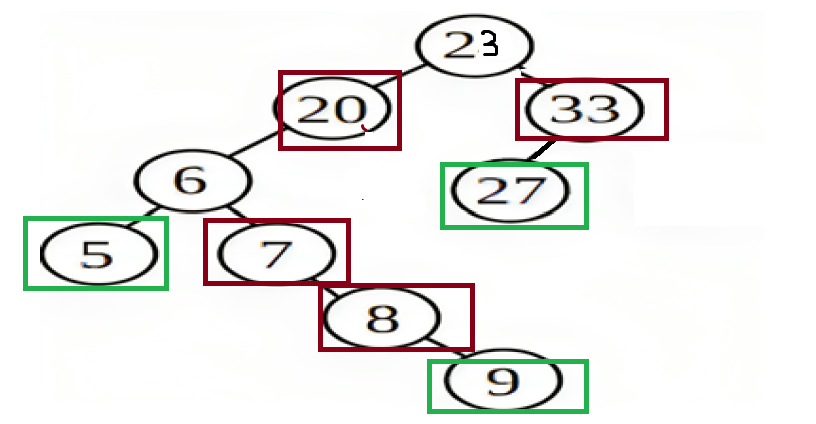

* a. Number of leaf nodes DECREASES in the resulting tree
   - original tree had 4 leaves, now tree has 3 leaves--TRUE
* b. Node 23 is the ROOT node in the resulting tree--TRUE
* c. There are 5 nodes with only one child in the resulting tree--FALSE
   - There are 4 nodes with 1 child
* d. Node 33 is NOT a LEAF node in the resulting tree--True

### Fall2023 Q5 -- BT & BST(successor, predecessor)

Given the array representation of a binary tree: [None value means the node is empty]
- [None, 19, 22, 10, 32, 20, None, 30, None, 5, None, 7, None, None, 2, -2]


- a. Draw the binary tree. [2 marks]
- b. Write the post-order and pre-order traversal sequence of the tree. [1 marks]
- c. Use the pre-order traversal sequence in part b to insert the elements in that order
in an initially empty binary search tree, and show the resulting binary search tree.
Note: Consider the first element of the pre-order sequence as the root. [2 marks]
- d. Perform the following operations step by step sequentially on the Binary Search. Tree you created in part c. [2 marks]
    * i) Delete node 5 with the help of its successor.
    * ii) Delete node 20 with the help of its predecessor.

[Solution pdf](https://drive.google.com/file/d/1PVacW8LYVYLEDlUfRwmIZVwEF3T_qzyP/view?usp=sharing)

### Fall2024 Q2 (BT+ BST: successor, predecessor, balanced, complete)

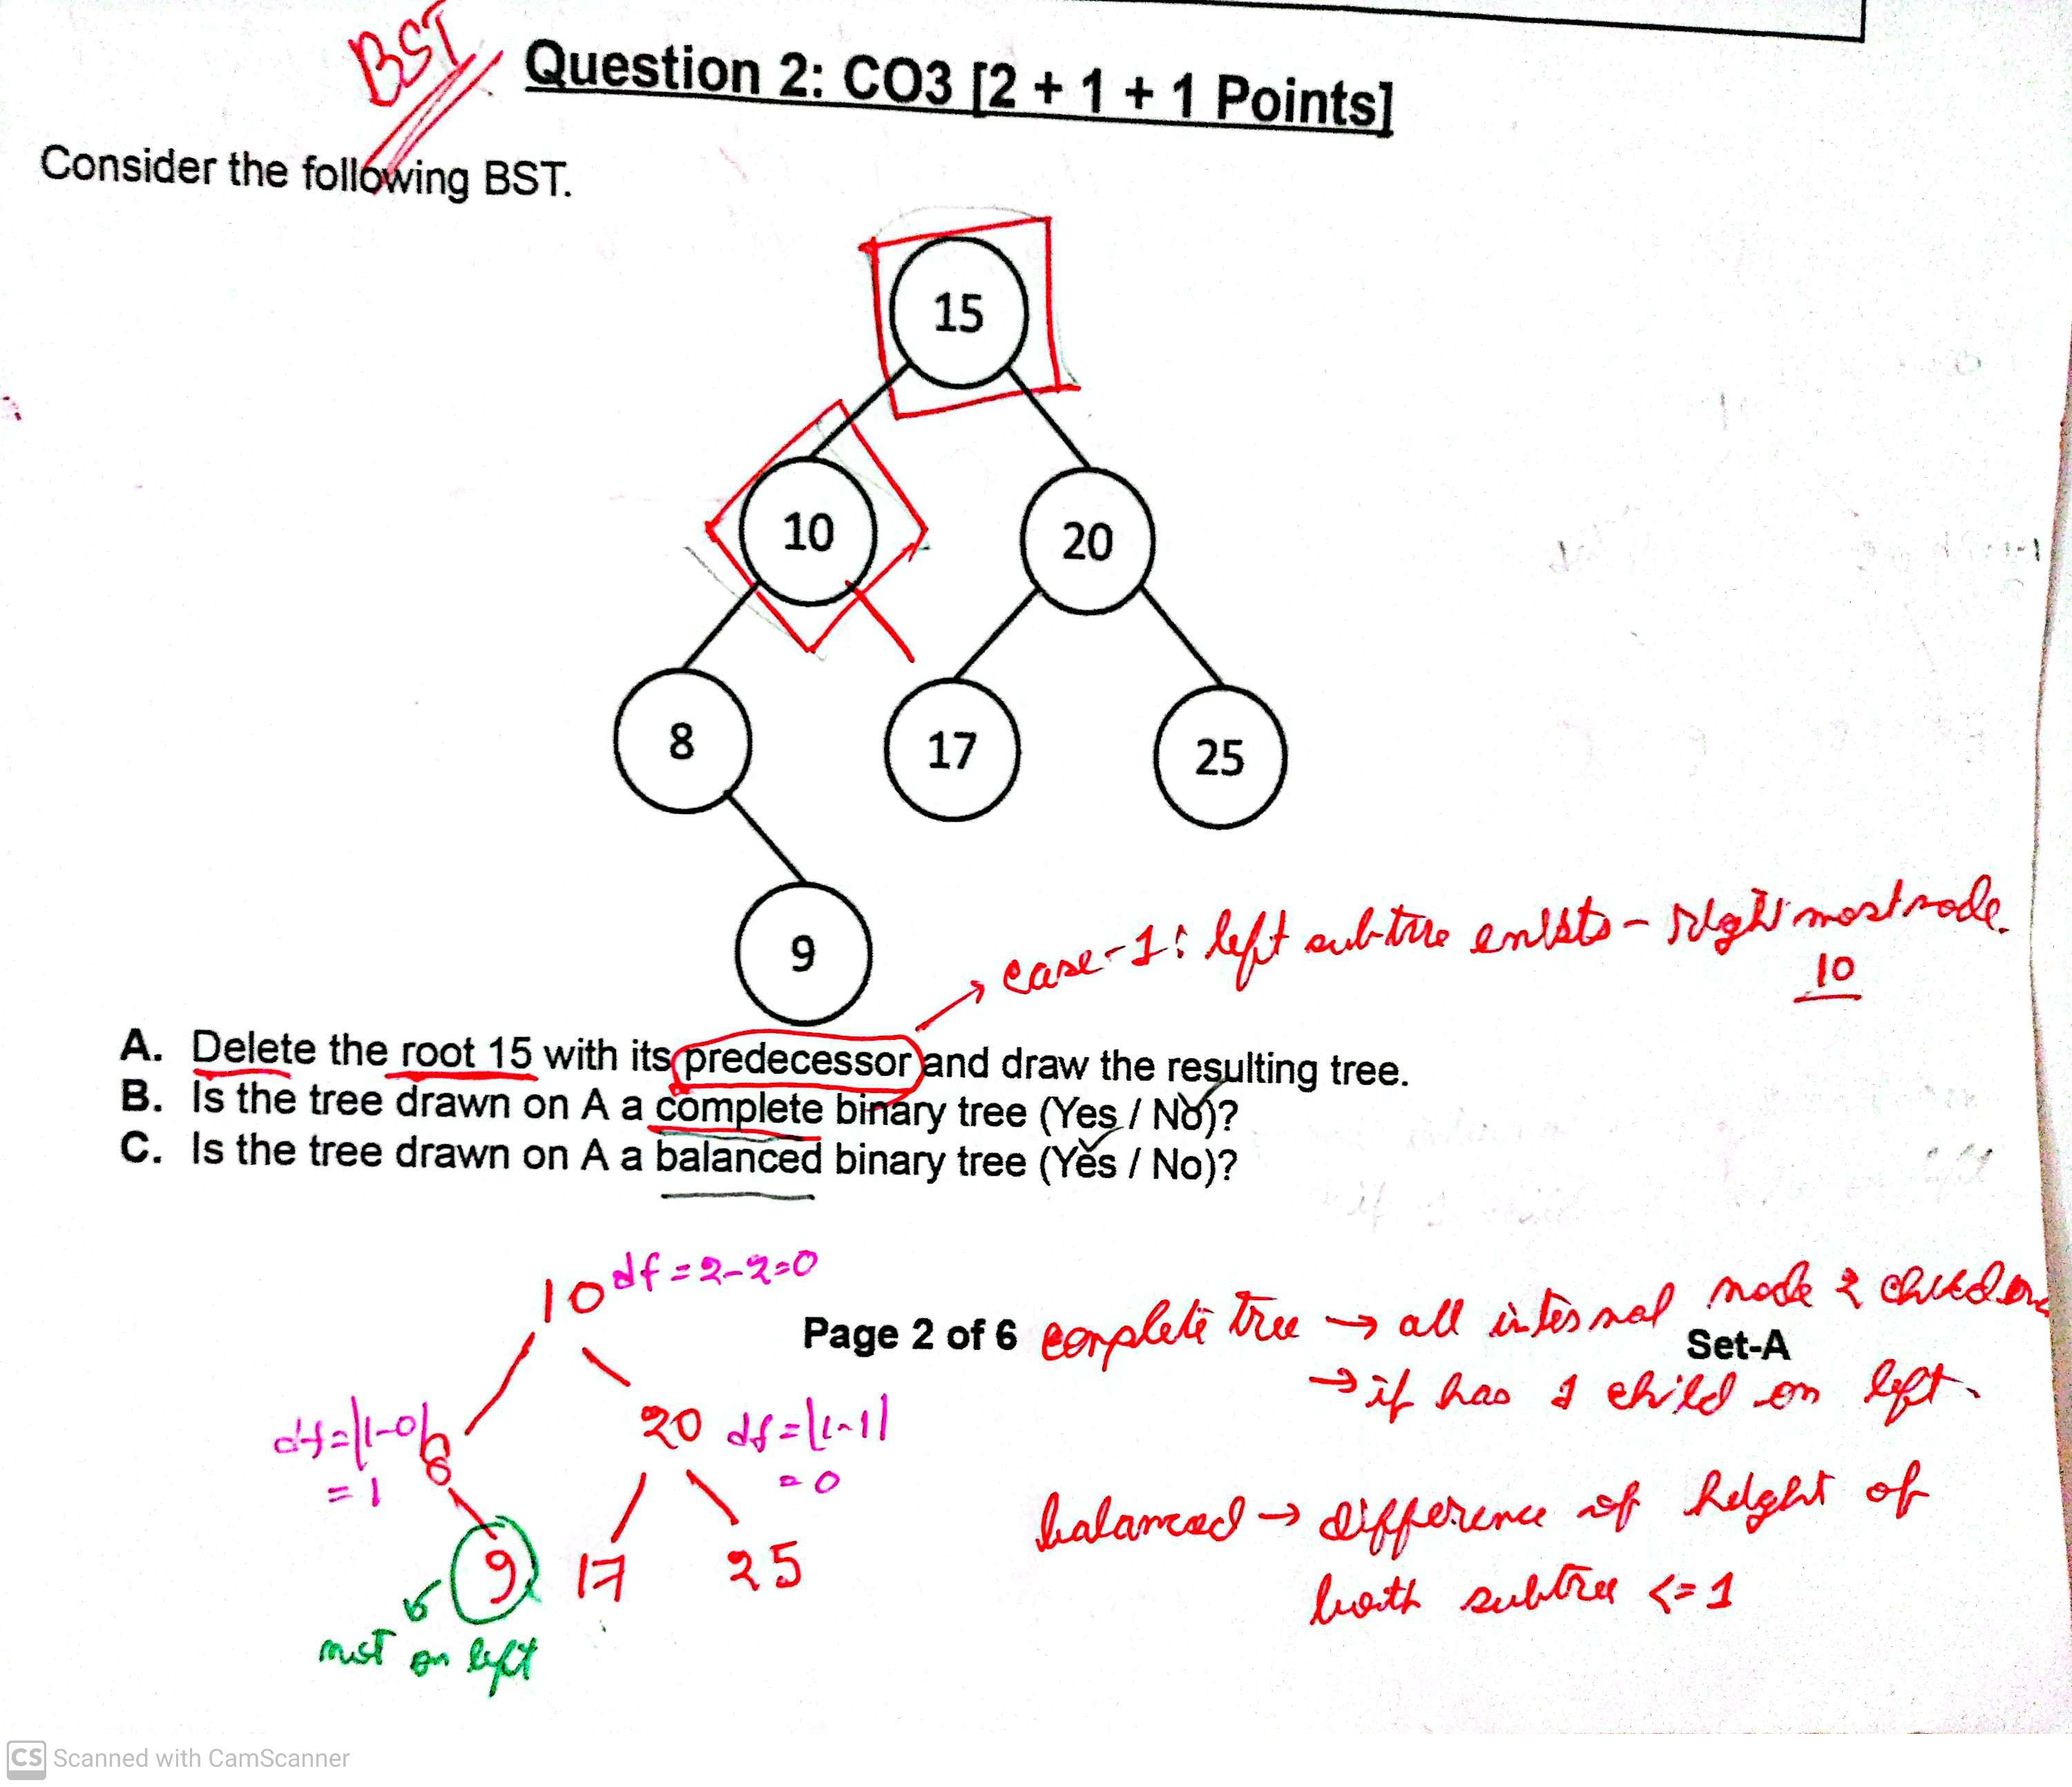

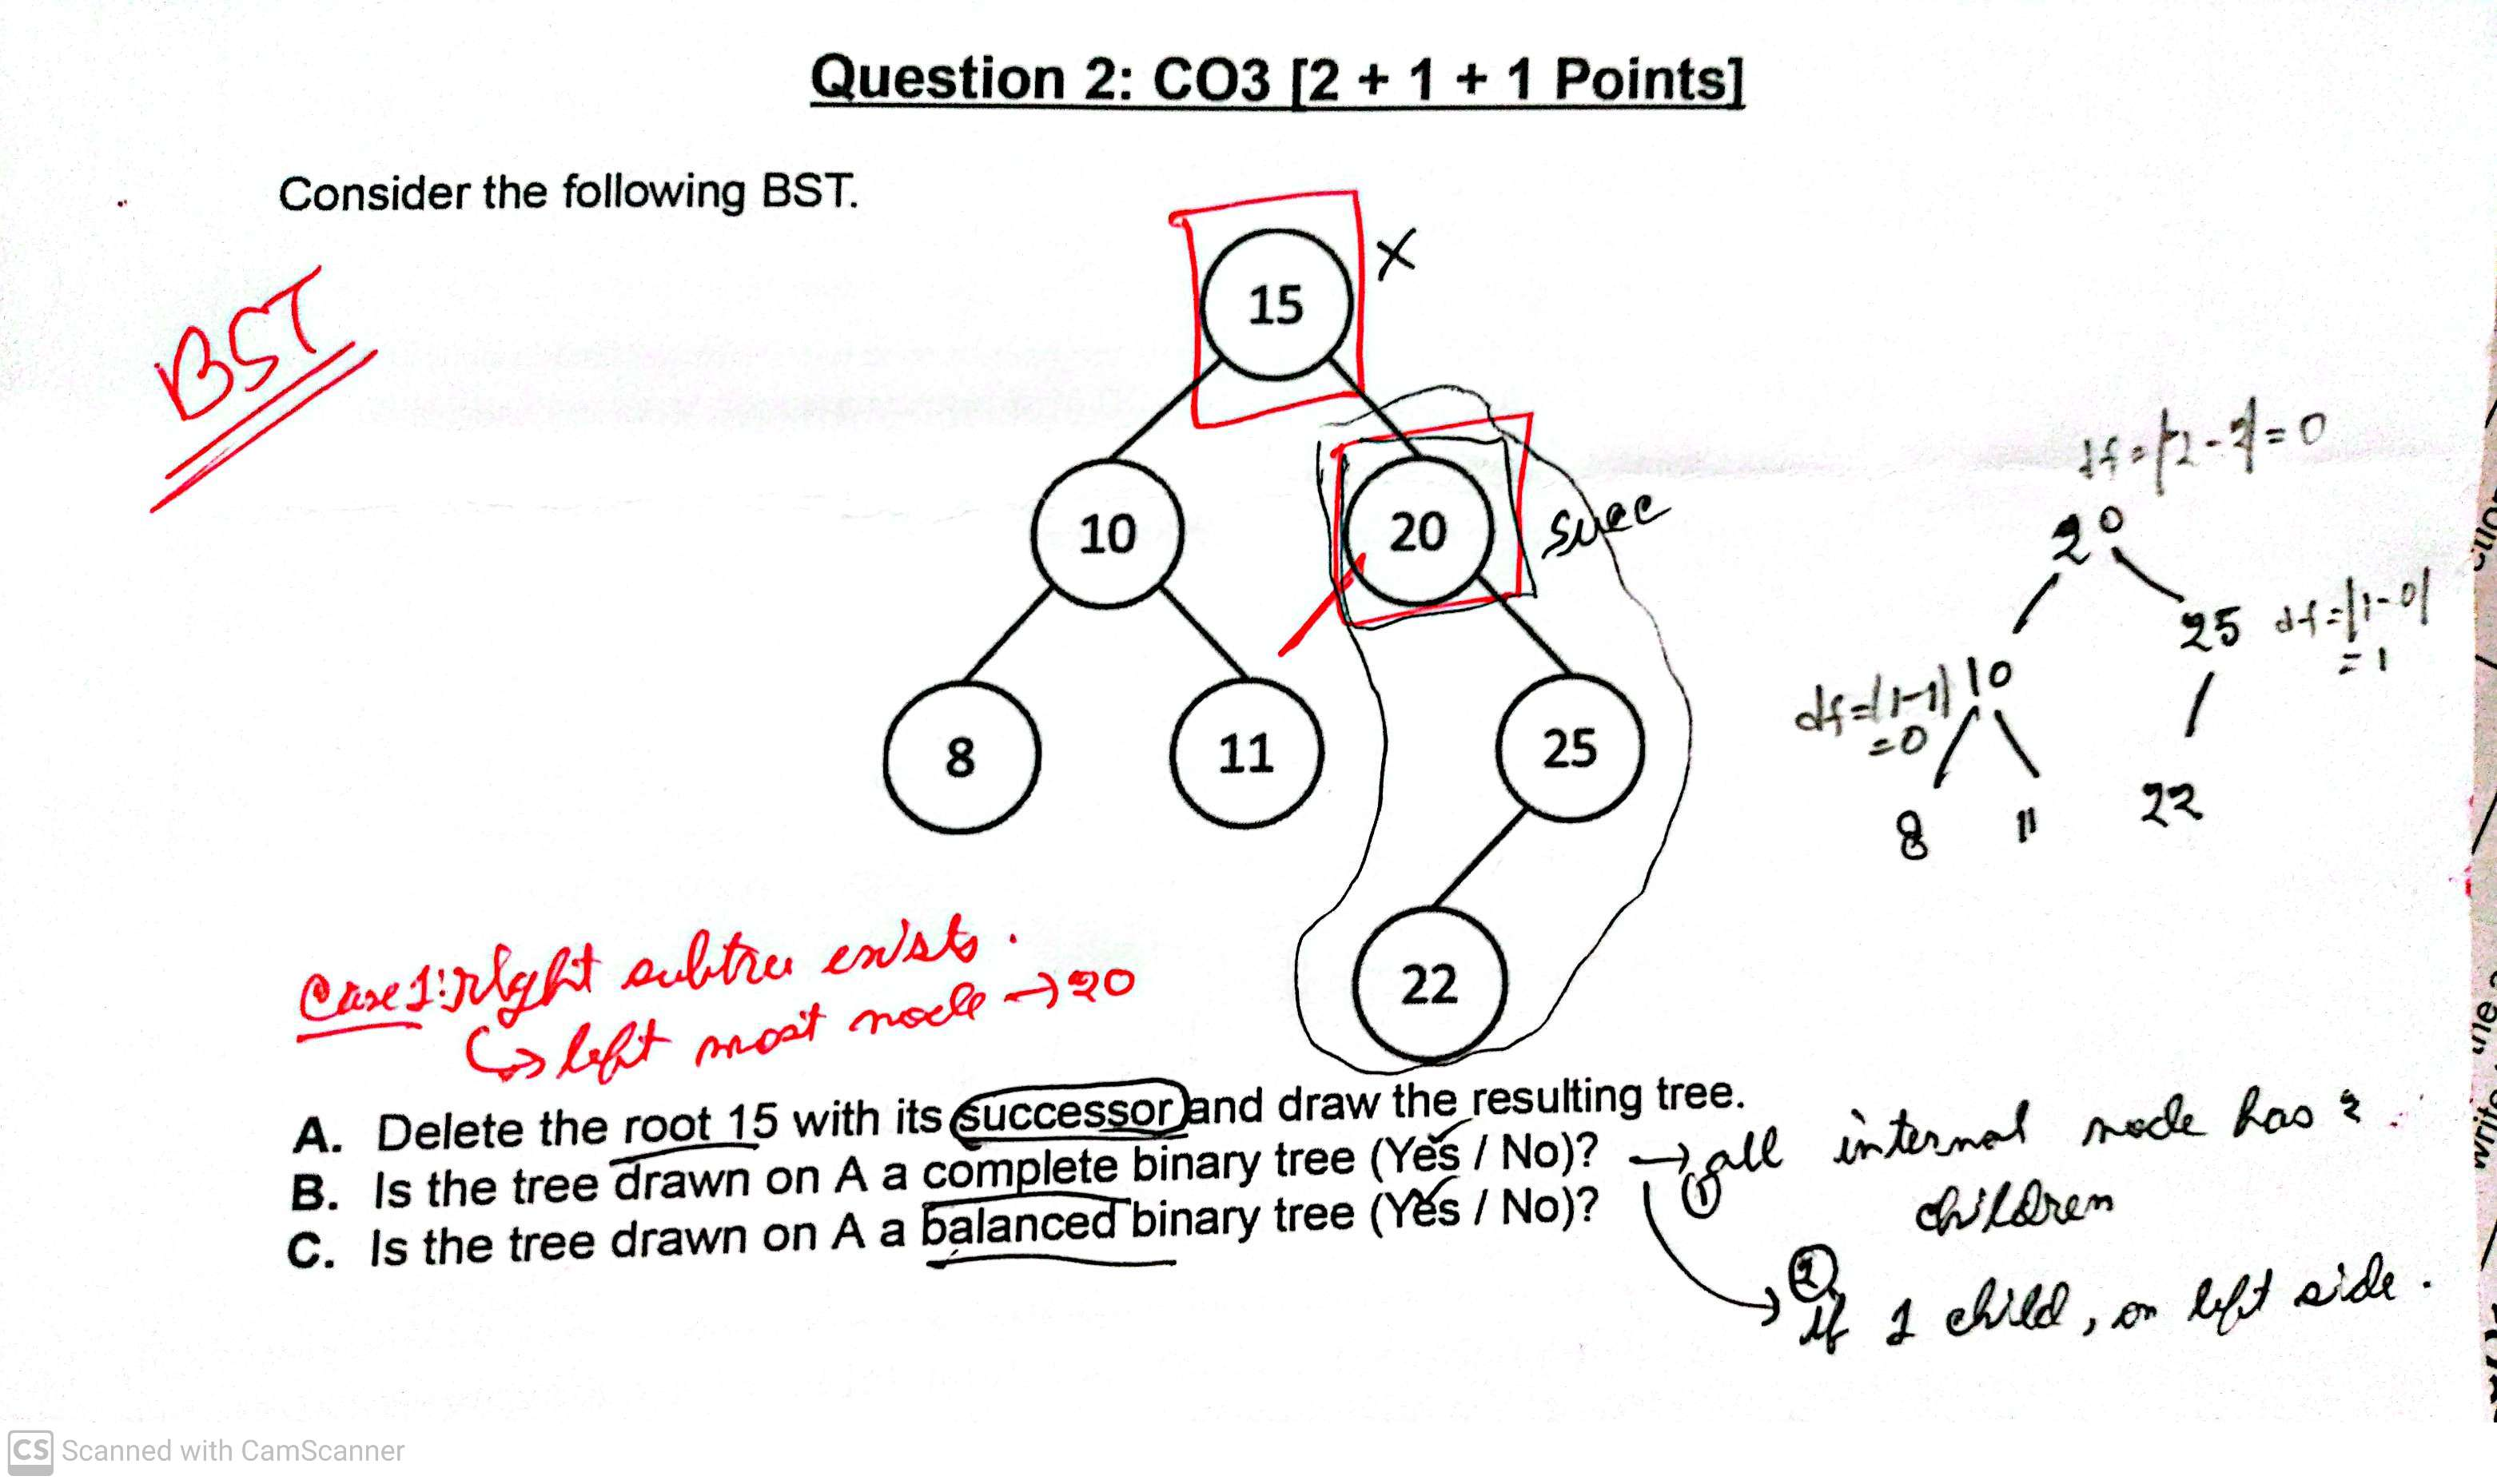

### Summer2024 Q4 (insert, BST traversal, balanced)


* [Spring2024 Q4 question](https://drive.google.com/file/d/1KZuAS27qc0eIZ2Ll9aiSCEFGY3RjW59u/view?usp=sharing)

* [Spring2024 Q4 solution](https://drive.google.com/file/d/1kFRsDgJEY3IqHT_9Id2u7RIX0BOfd8up/view?usp=sharing)

## Heap

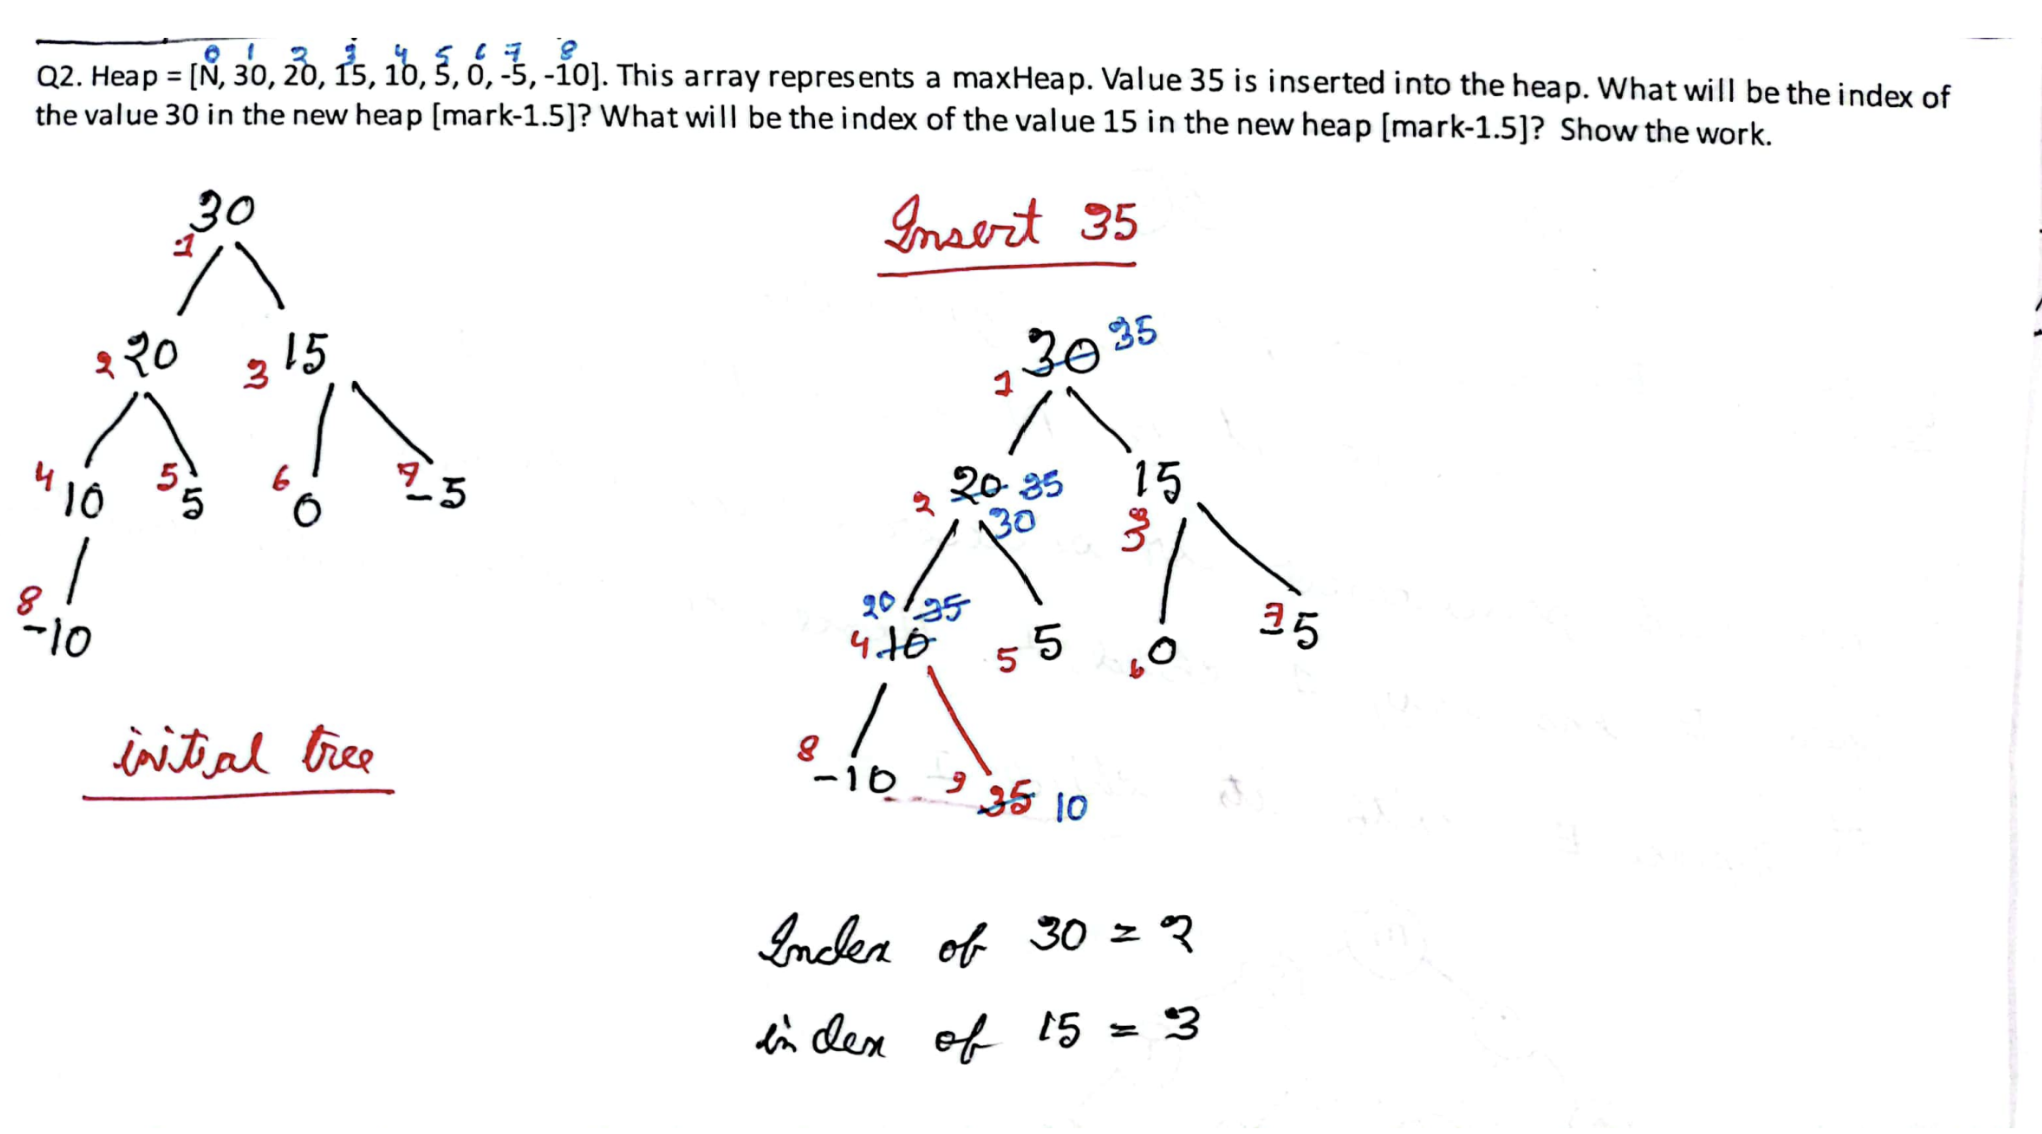


### Spring 2024 Q4

#### Solution with heap

In [ ]:
class MaxHeap:
    def __init__(self, size=10):
        self.heap = [None] * (size + 1)  # 1-based indexing
        self.size = 0

    def get_left_child_index(self, idx):
        return 2 * idx

    def get_right_child_index(self, idx):
        return 2 * idx + 1

    def get_parent_index(self, idx):
        if idx == 1:
            return None
        return idx // 2

    def max_heapify(self, index):
        left_child_index = self.get_left_child_index(index)
        right_child_index = self.get_right_child_index(index)

        largest = index

        if left_child_index <= self.size and self.heap[left_child_index] > self.heap[largest]:
            largest = left_child_index

        if right_child_index <= self.size and self.heap[right_child_index] > self.heap[largest]:
            largest = right_child_index

        if largest != index:
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            self.max_heapify(largest)

    def heap_increase_key(self, idx, key):
        if key < self.heap[idx]:
            print("New key is smaller than current key. Cannot insert.")
            return

        self.heap[idx] = key
        while idx > 1 and self.heap[self.get_parent_index(idx)] < self.heap[idx]:
            parent_idx = self.get_parent_index(idx)
            self.heap[idx], self.heap[parent_idx] = self.heap[parent_idx], self.heap[idx]
            idx = parent_idx

    def max_heap_insert(self, key):
        """
        Inserts a new key into the max-heap while maintaining the heap property.
        Adds the key to the next available position and swims it upwards.
        """
        if self.size >= len(self.heap) - 1:  # Fix: len(self.heap) - 1 because index 0 is unused
            print("No Space Left for", key)
            return

        self.size += 1
        self.heap[self.size] = float('-inf')  # Initially set to -infinity
        self.heap_increase_key(self.size, key)

    def delete_max(self):
        if self.size < 1:
            return None
        max_value = self.heap[1]
        self.heap[1] = self.heap[self.size]
        self.size -= 1
        self.max_heapify(1)
        return max_value

    def build_max_heap(self):
        """
        Converts an unsorted array into a max-heap.
        """
        for i in range(self.size // 2, 0, -1):
            self.max_heapify(i)
###############################################################################

class MinHeap:
    def __init__(self, size=10):
        self.heap = [None] * (size + 1)  # 1-based indexing
        self.size = 0

    def get_left_child_index(self, idx):
        return 2 * idx

    def get_right_child_index(self, idx):
        return 2 * idx + 1

    def get_parent_index(self, idx):
        if idx == 1:
            return None
        return idx // 2

    def min_heapify(self, index):
        left_child_index = self.get_left_child_index(index)
        right_child_index = self.get_right_child_index(index)

        smallest = index

        if left_child_index <= self.size and self.heap[left_child_index] < self.heap[smallest]:
            smallest = left_child_index

        if right_child_index <= self.size and self.heap[right_child_index] < self.heap[smallest]:
            smallest = right_child_index

        if smallest != index:
            self.heap[index], self.heap[smallest] = self.heap[smallest], self.heap[index]
            self.min_heapify(smallest)

    def heap_decrease_key(self, idx, key):
        if key > self.heap[idx]:
            print("New key is larger than current key. Cannot insert.")
            return

        self.heap[idx] = key
        while idx > 1 and self.heap[self.get_parent_index(idx)] > self.heap[idx]:
            parent_idx = self.get_parent_index(idx)
            self.heap[idx], self.heap[parent_idx] = self.heap[parent_idx], self.heap[idx]
            idx = parent_idx

    def min_heap_insert(self, key):
        """
        Inserts a new key into the min-heap while maintaining the heap property.
        Adds the key to the next available position and swims it upwards.
        """
        if self.size >= len(self.heap) - 1:
            print("No Space Left for", key)
            return

        self.size += 1
        self.heap[self.size] = float('inf')  # Initially set to +infinity
        self.heap_decrease_key(self.size, key)

    def delete_min(self):
        if self.size < 1:
            return None
        min_value = self.heap[1]
        self.heap[1] = self.heap[self.size]
        self.size -= 1
        self.min_heapify(1)
        return min_value

    def build_min_heap(self):
        """
        Converts an unsorted array into a min-heap.
        """
        for i in range(self.size // 2, 0, -1):
            self.min_heapify(i)
###############################################################################


##### Solution with heap creation using insert()

In [ ]:
def heap_sum(A, k):
    for op in range(1, k + 1):
        max_heap = MaxHeap()
        min_heap = MinHeap()

        # Insert all elements into heaps
        for val in A:
            max_heap.max_heap_insert(val)
            min_heap.min_heap_insert(val)

        # Extract max and min
        max_val = max_heap.delete_max()
        min_val = min_heap.delete_min()
        diff = max_val - min_val

        # Remove first occurrences of max and min from A
        temp = []
        removed_max = False
        removed_min = False
        for val in A:
            if not removed_max and val == max_val:
                removed_max = True
                continue
            elif not removed_min and val == min_val:
                removed_min = True
                continue
            temp.append(val)

        # Add the difference back
        temp.append(diff)
        A = temp

        # Optional: show the operation step
        print(f"{op}th operation → Remove {max_val}, {min_val} → Insert diff = {diff} → Array becomes {A}")

    # Final sum
    return sum(A)


# Example usage:
A = [3, 2, 1, 5, 4]
print("Final sum =", heap_sum(A, 3))
print('-'*50)
A = [3, 2, 1, 5, 4]
print("Final sum =", heap_sum(A, 2))

1th operation → Remove 5, 1 → Insert diff = 4 → Array becomes [3, 2, 4, 4]
2th operation → Remove 4, 2 → Insert diff = 2 → Array becomes [3, 4, 2]
3th operation → Remove 4, 2 → Insert diff = 2 → Array becomes [3, 2]
Final sum = 5
--------------------------------------------------
1th operation → Remove 5, 1 → Insert diff = 4 → Array becomes [3, 2, 4, 4]
2th operation → Remove 4, 2 → Insert diff = 2 → Array becomes [3, 4, 2]
Final sum = 9


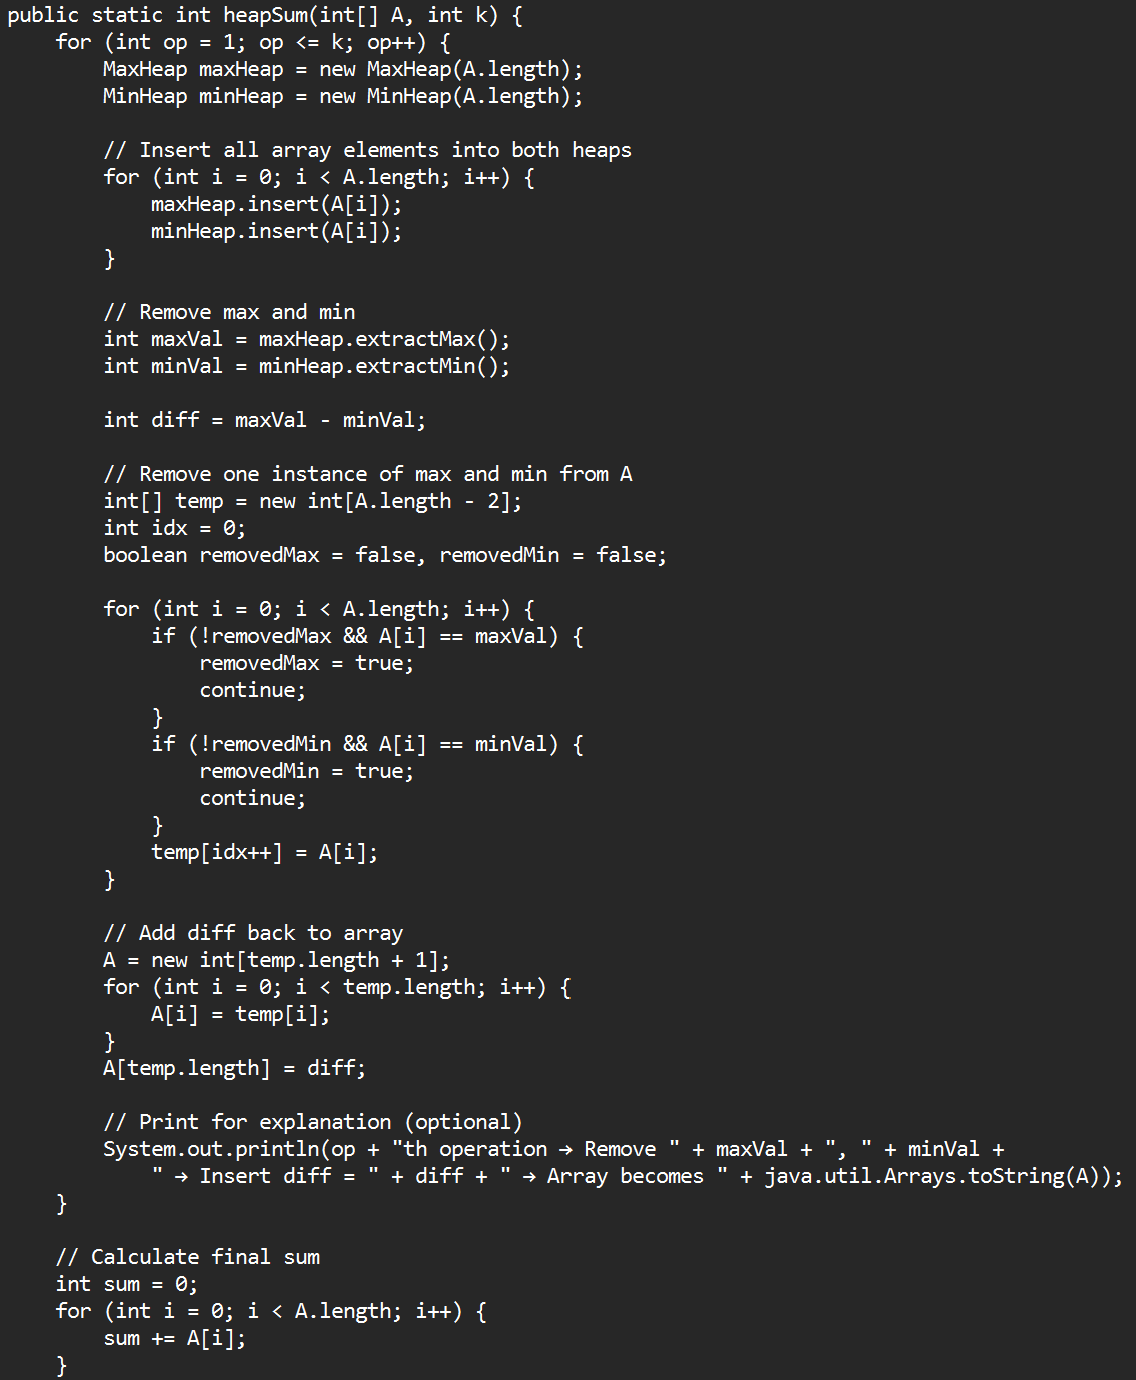

In [ ]:
def heap_sum(A, k):
    for op in range(1, k + 1):
        max_heap = MaxHeap()
        min_heap = MinHeap()

        # Insert all elements into heaps
        for val in A:
            max_heap.max_heap_insert(val)
            min_heap.min_heap_insert(val)

        # Extract max and min
        max_val = max_heap.delete_max()
        min_val = min_heap.delete_min()
        diff = max_val - min_val

        # Remove first occurrences of max and min from A using the remove() method
        A.remove(max_val)
        A.remove(min_val)

        # Add the difference back
        A.append(diff)

        # Optional: show the operation step
        print(f"{op}th operation → Remove {max_val}, {min_val} → Insert diff = {diff} → Array becomes {A}")

    # Final sum
    return sum(A)


# Example usage:
A = [3, 2, 1, 5, 4]
print("Final sum =", heap_sum(A, 3))
print('-'*50)
A = [3, 2, 1, 5, 4]
print("Final sum =", heap_sum(A, 2))


1th operation → Remove 5, 1 → Insert diff = 4 → Array becomes [3, 2, 4, 4]
2th operation → Remove 4, 2 → Insert diff = 2 → Array becomes [3, 4, 2]
3th operation → Remove 4, 2 → Insert diff = 2 → Array becomes [3, 2]
Final sum = 5
--------------------------------------------------
1th operation → Remove 5, 1 → Insert diff = 4 → Array becomes [3, 2, 4, 4]
2th operation → Remove 4, 2 → Insert diff = 2 → Array becomes [3, 4, 2]
Final sum = 9


### Solution without any heap [Above 50% marks will be deducted]

In [ ]:
def heapSum(A, k):
    # Perform the operation k times
    for _ in range(k):
        # Find the smallest and largest elements manually
        min_val = min(A)
        max_val = max(A)

        # Calculate the difference
        diff = max_val - min_val

        # Remove the smallest and largest elements
        A.remove(min_val)
        A.remove(max_val)

        # Add the difference back into the array
        A.append(diff)

        # Sort the array to maintain order for the next operation
        A.sort()

    # Return the sum of the elements in the final array
    return sum(A)

# Test case
A = [3, 2, 1, 5, 4]
k = 2
result = heapSum(A, k)
print(result)  # Expected Output: 9

9


### Fall 2024 Q4

As a Software Engineer at Microsoft, you need to schedule tasks on the CPU based on priority.  

- Given **n tasks with unique priorities** in an array and a **value k**, **perform the first k tasks with the highest priority.**
- Implement the function cpu_scheduler(tasks, k) to print the task numbers of the top **k tasks in descending order of priority.**

Use the provided MaxHeap or MinHeap classes with insert(item) and extract() (extract will return the extracted value) methods. You cannot iterate through the array manually to find out the highest priority task. Check sample input-output to find out the printing format.  

You can create an Empty Heap using the following code  

**Python Notation**  
```python
max_heap = MaxHeap()
min_heap = MinHeap()


In [ ]:
class MaxHeap:
    def __init__(self, size=10):
        self.heap = [None] * (size + 1)  # 1-based indexing
        self.size = 0

    def get_left_child_index(self, idx):
        return 2 * idx

    def get_right_child_index(self, idx):
        return 2 * idx + 1

    def get_parent_index(self, idx):
        if idx == 1:
            return None
        return idx // 2

    def max_heapify(self, index):
        left_child_index = self.get_left_child_index(index)
        right_child_index = self.get_right_child_index(index)

        largest = index

        if left_child_index <= self.size and self.heap[left_child_index] > self.heap[largest]:
            largest = left_child_index

        if right_child_index <= self.size and self.heap[right_child_index] > self.heap[largest]:
            largest = right_child_index

        if largest != index:
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            self.max_heapify(largest)

    def heap_increase_key(self, idx, key):
        if key < self.heap[idx]:
            print("New key is smaller than current key. Cannot insert.")
            return

        self.heap[idx] = key
        while idx > 1 and self.heap[self.get_parent_index(idx)] < self.heap[idx]:
            parent_idx = self.get_parent_index(idx)
            self.heap[idx], self.heap[parent_idx] = self.heap[parent_idx], self.heap[idx]
            idx = parent_idx

    def max_heap_insert(self, key):
        """
        Inserts a new key into the max-heap while maintaining the heap property.
        Adds the key to the next available position and swims it upwards.
        """
        if self.size >= len(self.heap) - 1:
            print("No Space Left for", key)
            return

        self.size += 1
        self.heap[self.size] = float('-inf')  # Initially set to -infinity
        self.heap_increase_key(self.size, key)

    def max_heap_extract(self):
        if self.size < 1:
            return None
        max_value = self.heap[1]
        self.heap[1] = self.heap[self.size]
        self.size -= 1
        self.max_heapify(1)
        return max_value

    def build_max_heap(self):
        """
        Converts an unsorted array into a max-heap.
        """
        for i in range(self.size // 2, 0, -1):
            self.max_heapify(i)
#########################################################################

def cpu_scheduler(tasks, k):### PART OF ANSWER
    # Create a MaxHeap with sufficient size
    max_heap = MaxHeap()

    # Insert all tasks into the MaxHeap
    for task in tasks:
        max_heap.max_heap_insert(task)

    # Extract the top k tasks and print their priorities
    for i in range(1, k + 1):
        top_priority = max_heap.max_heap_extract()
        print(f"Task {i} - Priority {top_priority}")


# Example usage
tasks = [45, 70, 85, 60, 90, 75]
k = 3
cpu_scheduler(tasks, k)


Task 1 - Priority 90
Task 2 - Priority 85
Task 3 - Priority 75


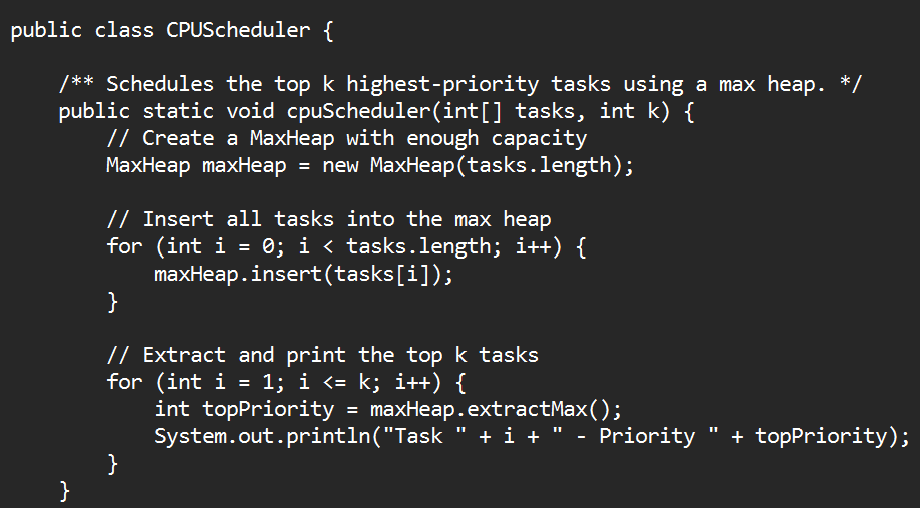

## Graph


### Spring 2024 Q5 (Graph+BST mixed)
* [Spring2024 graph question](https://drive.google.com/file/d/1k6qV3Ij6hL0BrHtc3cB0AnT1GSOR2wSP/view?usp=sharing)

* [Spring2024 graph question solution](https://drive.google.com/file/d/1sp0m0cOlfkRrHbQ5dPjOxCrH3LZv4DNU/view?usp=sharing)

### Fall 2024 Q5

You are organizing a Networking Conference where participants can interact multiple times,  
forming an undirected network graph where:

- **Vertices** represent participants.  
- **Edges** represent interactions (multiple edges indicate repeated interactions). Two vertices  
  having multiple edges between them mean two participants interact multiple times.  

A network graph is **complete** if every participant interacts with every other participant at least once.

Write a function `is_complete` to determine if a given network graph, represented as an  
**unweighted adjacency list**, is complete or not.  
If complete, the function should return `True`; otherwise, return `False`.

The `Edge` class has the following fields:
- `source` (Type: `String`)
- `destination` (Type: `String`)
- `next` (Type: `Edge`)

You can use extra arrays if you want but **cannot modify the given adjacency list**.

---

### Python Notation

```python
def is_complete(network):
    # To do


In [ ]:
class Edge:
    def __init__(self, source, destination, next_node=None):
        self.source = source
        self.destination = destination
        self.next = next_node


class AdjacencyListGraph:
    def __init__(self, num_vertices):
        self.adj_list = [None] * num_vertices  # List to hold adjacency list for each vertex
        self.num_vertices = num_vertices

    def add_edge(self, u, v):
        # Add edge from u to v
        new_edge = Edge(u, v, self.adj_list[u])
        self.adj_list[u] = new_edge

        # Add edge from v to u (for undirected graph)
        new_edge = Edge(v, u, self.adj_list[v])
        self.adj_list[v] = new_edge

    def display_graph(self):
        for i in range(self.num_vertices):
            print(f"Vertex {i}:", end=" ")
            current = self.adj_list[i]
            while current:
                print(f"({current.source}, {current.destination})", end=" → ")
                current = current.next
            print("None")
###################################################################################################
    def is_complete(self): #### WRITE ONLY THIS FUNCTION FOR ANSWER
        # A complete graph means every vertex is connected to every other vertex
        for current_vertex in range(self.num_vertices):
            connected = [False] * self.num_vertices  # Track connections for current_vertex

            current_edge = self.adj_list[current_vertex]  # Head of adjacency list

            # Traverse adjacency list and mark connected vertices
            while current_edge is not None:
                connected[current_edge.destination] = True
                current_edge = current_edge.next

            # Check that all other vertices (excluding itself) are connected
            for other_vertex in range(self.num_vertices):
                if current_vertex != other_vertex and not connected[other_vertex]:
                    return False  # Missing a required connection

        return True  # Every vertex is connected to all others

#########################################################################

# Example usage
num_vertices = 4
graph = AdjacencyListGraph(num_vertices)

# Add edges
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(0, 3)
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(2, 3)

# Display the graph
graph.display_graph()

# Check if the graph is complete
print(graph.is_complete())  # Output: True

SyntaxError: invalid syntax (<ipython-input-1-ee2ce1ad336a>, line 18)